In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten


In [ ]:
(xtrain , ytrain) , (xtest , ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


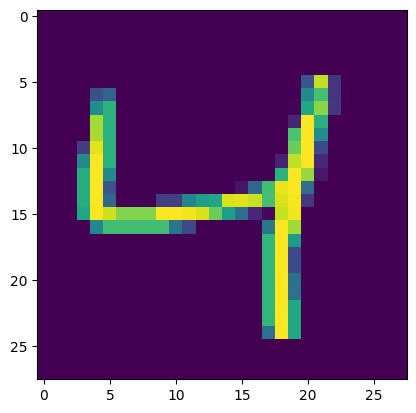

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[2])

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [ ]:
history = model.fit(xtrain , ytrain , epochs = 10 , validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2788 - accuracy: 0.9189 - val_loss: 0.1444 - val_accuracy: 0.9588
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.1165 - val_accuracy: 0.9649
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0833 - accuracy: 0.9743 - val_loss: 0.1024 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.1035 - val_accuracy: 0.9709
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.1038 - val_accuracy: 0.9709
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.1066 - val_accuracy: 0.9713
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.1011 - val_accuracy:

In [ ]:
yprob = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
ypred = yprob.argmax(axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(ytest , ypred)

0.9738

In [ ]:
history.history

{'loss': [0.27880367636680603,
  0.12026023119688034,
  0.08329246193170547,
  0.06357557326555252,
  0.04923258349299431,
  0.039379991590976715,
  0.03228563815355301,
  0.02490881085395813,
  0.023722954094409943,
  0.018729468807578087],
 'accuracy': [0.918874979019165,
  0.9638749957084656,
  0.9742916822433472,
  0.9810208082199097,
  0.984541654586792,
  0.9871041774749756,
  0.9890833497047424,
  0.991854190826416,
  0.9917916655540466,
  0.9940624833106995],
 'val_loss': [0.14443886280059814,
  0.11648926883935928,
  0.10237380117177963,
  0.10351560264825821,
  0.10377256572246552,
  0.10660221427679062,
  0.1011328250169754,
  0.10509655624628067,
  0.11286239326000214,
  0.11117149144411087],
 'val_accuracy': [0.9587500095367432,
  0.9649166464805603,
  0.9695833325386047,
  0.9709166884422302,
  0.9709166884422302,
  0.9713333249092102,
  0.9726666808128357,
  0.9744166731834412,
  0.9737499952316284,
  0.9762499928474426]}

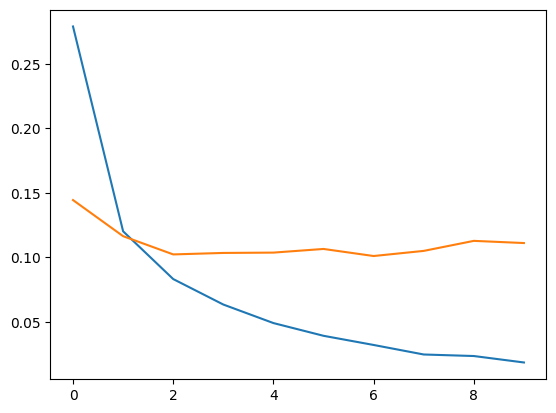

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

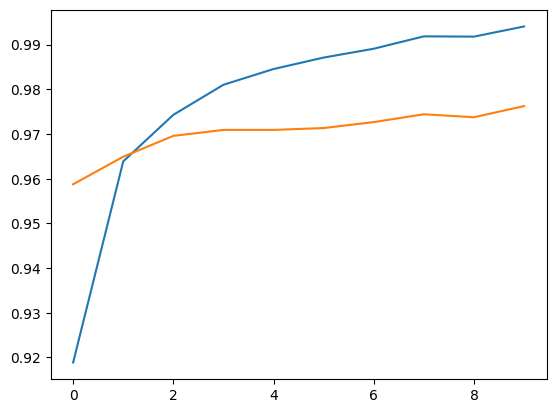

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
